In [2]:
from pydantic import BaseModel, Field
from typing import List
from datetime import date

class Task(BaseModel):
    id: int
    name: str
    description: str
    status: str
    due_date: date

class Milestone(BaseModel):
    id: int
    name: str
    description: str
    start_date: date
    end_date: date
    tasks: List[Task]

class MilestonePlan(BaseModel):
    project_name: str
    milestones: List[Milestone]

# Example usage
example_data = {
    "project_name": "Project Alpha",
    "milestones": [
        {
            "id": 1,
            "name": "Milestone 1",
            "description": "Initial setup and configuration",
            "start_date": "2024-01-01",
            "end_date": "2024-01-15",
            "tasks": [
                {
                    "id": 1,
                    "name": "Task 1",
                    "description": "Setup project repository",
                    "status": "completed",
                    "due_date": "2024-01-02"
                },
                {
                    "id": 2,
                    "name": "Task 2",
                    "description": "Initial project configuration",
                    "status": "in-progress",
                    "due_date": "2024-01-10"
                }
            ]
        },
        {
            "id": 2,
            "name": "Milestone 2",
            "description": "Development Phase 1",
            "start_date": "2024-01-16",
            "end_date": "2024-02-15",
            "tasks": [
                {
                    "id": 3,
                    "name": "Task 3",
                    "description": "Develop feature A",
                    "status": "not-started",
                    "due_date": "2024-01-30"
                }
            ]
        }
    ]
}

# Validate and serialize the data
milestone_plan = MilestonePlan(**example_data)
print(milestone_plan.json(indent=2))


{
  "project_name": "Project Alpha",
  "milestones": [
    {
      "id": 1,
      "name": "Milestone 1",
      "description": "Initial setup and configuration",
      "start_date": "2024-01-01",
      "end_date": "2024-01-15",
      "tasks": [
        {
          "id": 1,
          "name": "Task 1",
          "description": "Setup project repository",
          "status": "completed",
          "due_date": "2024-01-02"
        },
        {
          "id": 2,
          "name": "Task 2",
          "description": "Initial project configuration",
          "status": "in-progress",
          "due_date": "2024-01-10"
        }
      ]
    },
    {
      "id": 2,
      "name": "Milestone 2",
      "description": "Development Phase 1",
      "start_date": "2024-01-16",
      "end_date": "2024-02-15",
      "tasks": [
        {
          "id": 3,
          "name": "Task 3",
          "description": "Develop feature A",
          "status": "not-started",
          "due_date": "2024-01-30"
       

In [3]:
from jinja2 import Environment, FileSystemLoader

# Load the template
env = Environment(loader=FileSystemLoader('.'))
template = env.get_template('milestone_plan_template.html')

# Render the template with the milestone plan data
html_output = template.render(milestone_plan.dict())

# Save the output to a file
with open('milestone_plan.html', 'w') as f:
    f.write(html_output)


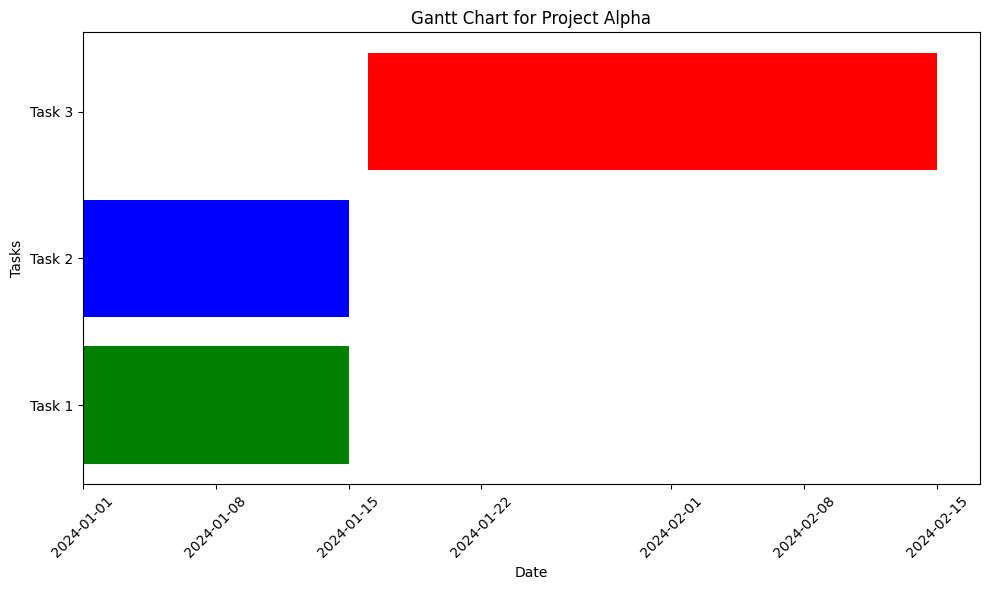

In [4]:
from pydantic import BaseModel, Field
from typing import List
from datetime import date, datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Pydantic models
class Task(BaseModel):
    id: int
    name: str
    description: str
    status: str
    due_date: date

class Milestone(BaseModel):
    id: int
    name: str
    description: str
    start_date: date
    end_date: date
    tasks: List[Task]

class MilestonePlan(BaseModel):
    project_name: str
    milestones: List[Milestone]

# Convert the milestone plan to a DataFrame
def milestones_to_dataframe(milestone_plan: MilestonePlan):
    data = []
    for milestone in milestone_plan.milestones:
        for task in milestone.tasks:
            data.append({
                'Task': task.name,
                'Start': milestone.start_date,
                'End': milestone.end_date,
                'Status': task.status
            })
    return pd.DataFrame(data)

# Create a Gantt chart
def create_gantt_chart(df, project_name):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create a color map based on the task status
    colors = {'completed': 'green', 'in-progress': 'blue', 'not-started': 'red'}
    
    for i, row in df.iterrows():
        ax.barh(row['Task'], (row['End'] - row['Start']).days, left=row['Start'], color=colors.get(row.get('Status', 'not-started'), 'gray'))
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Tasks')
    ax.set_title(f'Gantt Chart for {project_name}')
    ax.xaxis_date()

    # Set the format of the date axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Example milestone plan
example_data = {
    "project_name": "Project Alpha",
    "milestones": [
        {
            "id": 1,
            "name": "Milestone 1",
            "description": "Initial setup and configuration",
            "start_date": "2024-01-01",
            "end_date": "2024-01-15",
            "tasks": [
                {
                    "id": 1,
                    "name": "Task 1",
                    "description": "Setup project repository",
                    "status": "completed",
                    "due_date": "2024-01-02"
                },
                {
                    "id": 2,
                    "name": "Task 2",
                    "description": "Initial project configuration",
                    "status": "in-progress",
                    "due_date": "2024-01-10"
                }
            ]
        },
        {
            "id": 2,
            "name": "Milestone 2",
            "description": "Development Phase 1",
            "start_date": "2024-01-16",
            "end_date": "2024-02-15",
            "tasks": [
                {
                    "id": 3,
                    "name": "Task 3",
                    "description": "Develop feature A",
                    "status": "not-started",
                    "due_date": "2024-01-30"
                }
            ]
        }
    ]
}

# Validate and serialize the data
milestone_plan = MilestonePlan(**example_data)

# Generate Gantt chart
df = milestones_to_dataframe(milestone_plan)
create_gantt_chart(df, milestone_plan.project_name)
